# Customer Personality Analysis 👩🏾‍⚕️👷🏻‍♂️👨🏽‍💼👨🏼‍🎓
**Win K Phyo**

## Table of Contents
[Introduction](#introduction)  
[Dictionary](#dictionary)  
[Exploratory Analysis](#exploratory-analysis)
- [Feature Engineering](#feature-engineering)  

[Data Preprocessing](#data-preprocessing)

<a id="introduction"></a>

## Introduction
Hello again. Today, we have another data science project built around yet another Kaggle dataset. This time around, we're working with customer data from a grocery 🍊🛒 company. The goal of this project is to identify customer segments based around common features that we can use to tailor future marketing efforts, and otherwise further personalize the experiences of our customers.

<a id="dictionary"></a>

## Dictionary

| Category 📁    | Attribute 🔑         | Explanation 📖                                                   |
|----------------|---------------------|--------------------------------------------------------------------|
|**People** 🧑   | ID                  | Customer's unique identifier                                       |
|                | Year_Birth          | Customer's birth year                                              |
|                | Education           | Customer's education level                                         |
|                | Marital_Status      | Customer's marital status                                          |
|                | Income              | Customer's yearly household income                                 |
|                | Kidhome             | Number of children in customer's household                         |
|                | Teenhome            | Number of teenagers in customer's household                        |
|                | Dt_Customer         | Date of customer's enrollment with the company                     |
|                | Recency             | Number of days since customer's last purchase                      |
|                | Complain            | 1 if customer complained in the last 2 years, 0 otherwise          |
|**Products** 🛒 | MntWines            | Amount spent on wine in last 2 years                               |
|                | MntFruits           | Amount spent on fruits in last 2 years                             |
|                | MntMeatProducts     | Amount spent on meat in last 2 years                               |
|                | MntFishProducts     | Amount spent on fish in last 2 years                               |
|                | MntSweetProducts    | Amount spent on sweets in last 2 years                             |
|                | MntGoldProds        | Amount spent on gold in last 2 years                               |
|**Promotion** 🎊| NumDealsPurchases   | Number of purchases made with a discount                           |
|                | AcceptedCmp1        | 1 if customer accepted the offer in the 1st campaign, 0 otherwise  |
|                | AcceptedCmp2        | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  |
|                | AcceptedCmp3        | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  |
|                | AcceptedCmp4        | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  |
|                | AcceptedCmp5        | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  |
|                | Response            | 1 if customer accepted the offer in the last campaign, 0 otherwise |
|**Place** 🌎    | NumWebPurchases     | Number of purchases made through the company’s web site            |
|                | NumCatalogPurchases | Number of purchases made using a catalogue                         |
|                | NumStorePurchases   | Number of purchases made directly in stores                        |
|                | NumWebVisitsMonth   | Number of visits to company’s web site in the last month           |

<a id="exploratory-analysis"></a>

## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


sns.set_theme(style="whitegrid")

In [2]:
# Import the dataset
data = pd.read_csv('marketing_campaign.csv', sep='\t')
print("The size of our dataset is", len(data), "rows.")

The size of our dataset is 2240 rows.


In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# We can confirm the attributes we have available to us
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Z_CostContact and Z_Revenue were not present in the data dictionary given to us. Let us keep them in mind and continue to explore our dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We can immediately notice a few issues with the data. Education and marital status should be converted to ***category*** type, and Dt_Customer should be ***datetime***.

Z_CostContact and Z_Revenue are observed to be of type ***int***, and have no null values.

In [6]:
data['Education'] = data['Education'].astype('category')
data['Marital_Status'] = data['Marital_Status'].astype('category')
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [7]:
# Let's check for unique values
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Z_CostContact and Z_Revenue each only contain one unique value for the entire dataset. This means we can safely drop them, as they are the same for each record.

In [8]:
print("Z_CostContact unique value:", data['Z_CostContact'].unique()[0])
print("Z_Revenue unique value:",data['Z_Revenue'].unique()[0])

data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

Z_CostContact unique value: 3
Z_Revenue unique value: 11


In [9]:
# Let's check for null values
data.isna().sum()[data.isna().sum()!=0]

Income    24
dtype: int64

There are 24 null values in the income column. For now, let's just drop them and continue working, but we'll save the dropped records in a separate dataframe for later.

In [10]:
null_income_df = data[data['Income'].isna()==True]
df = data.drop(data.loc[data['Income'].isna()==True].index)

In [11]:
# Let's take a look at those categorical variables
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

These are fine.

In [12]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

These are not so fine. Let's group Alone with Single, and drop Absurd and YOLO.

In [13]:
df['Marital_Status'].replace('Alone', 'Single', inplace=True)
df.drop(
    df.loc[(df['Marital_Status']=='Absurd') | (df['Marital_Status']=='YOLO')].index,
    inplace=True
)

<a id="feature-engineering"></a>

### Feature Engineering ###

Now, let's try to derive some additional features from the attributes we have available to us.

In [14]:
test = pd.to_datetime('2021-11-28')
test

Timestamp('2021-11-28 00:00:00')

In [15]:
# We can derive the age of a customer from their Year_Birth. To keep things
# consistent, we'll normalize dates by using November 28, 2021 as a baseline.
df['Age'] = 2021 - df['Year_Birth']

# We'll do the same for Dt_Customer to calculate how many days it's been since
# someone's been registered as a customer.
df['CompanyAge'] = pd.to_datetime('2021-11-28') - df['Dt_Customer']
df['CompanyAge'] = df['CompanyAge'].dt.days

# Let's calculate total spending per customer
df['TotalAmountSpent'] = df[[
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds'
]].sum(axis=1)

# Total transaction volume per customer as well
df['TotalTransactions'] = df[[
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases'
]].sum(axis=1)

# Now, we can drop Year_Birth, and Dt_Customer. Let's also drop ID.
df.drop(columns=['ID', 'Year_Birth', 'Dt_Customer'], inplace=True)

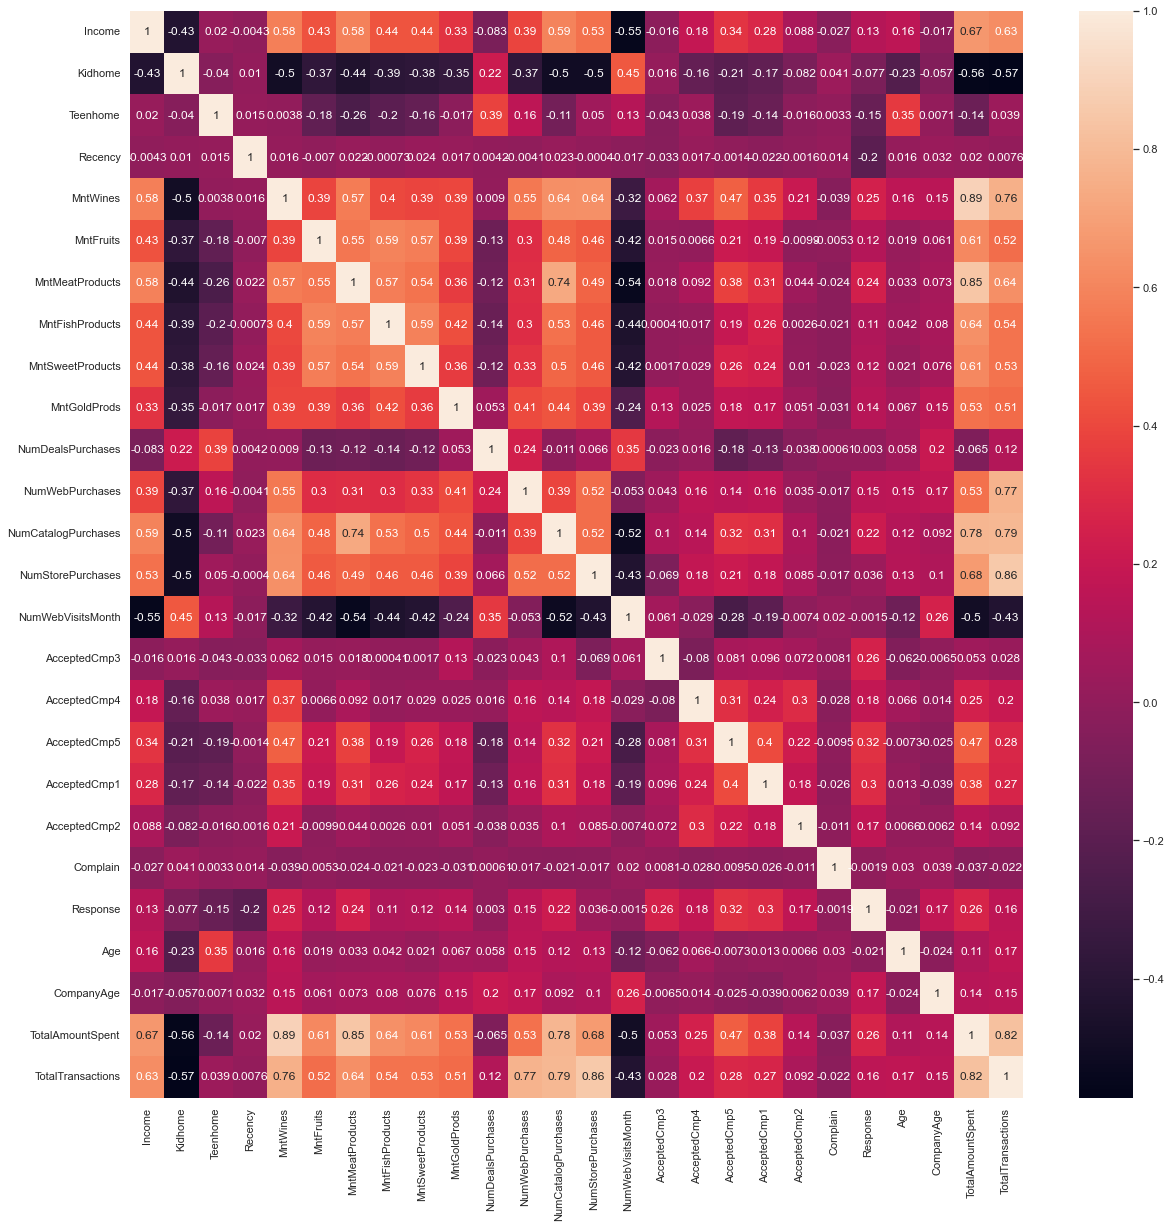

In [16]:
# Let's take a closer look at our numeric columns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

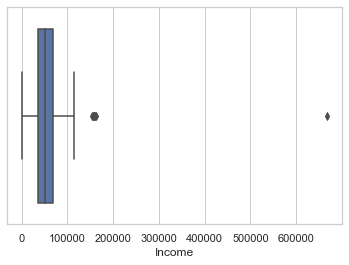

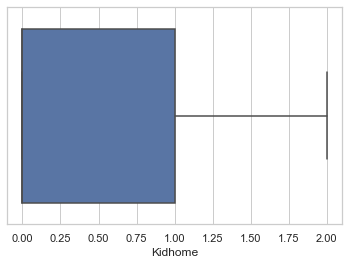

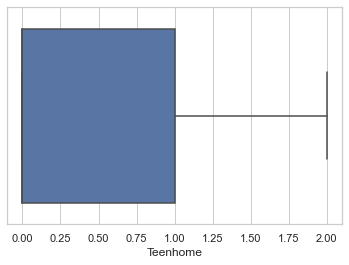

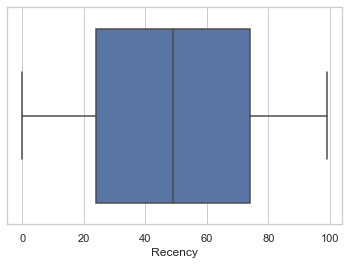

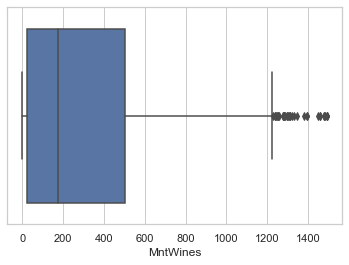

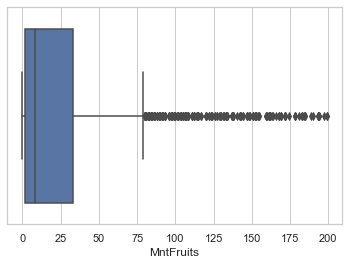

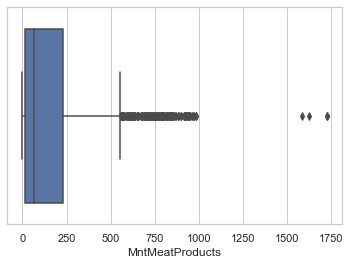

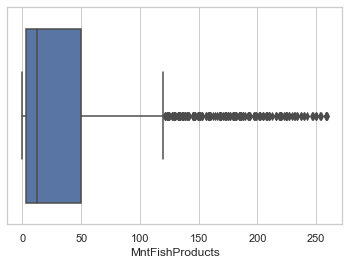

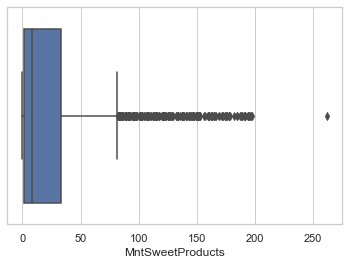

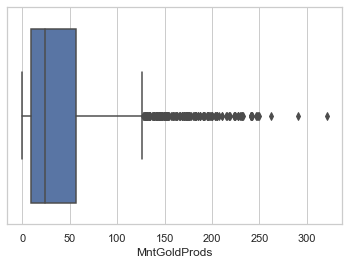

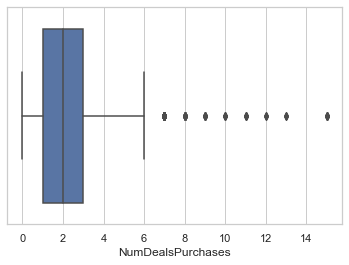

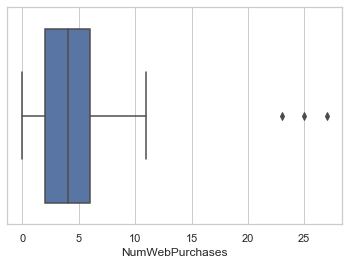

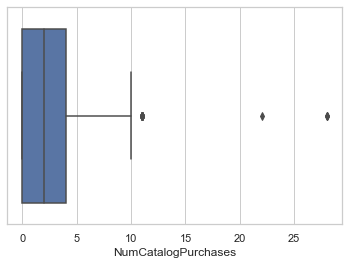

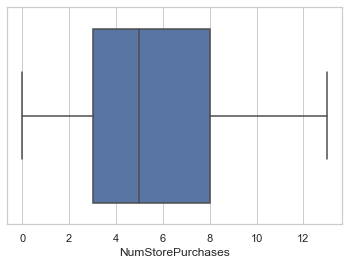

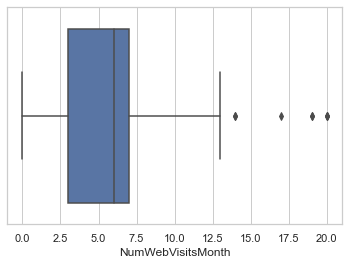

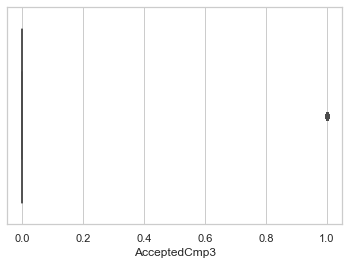

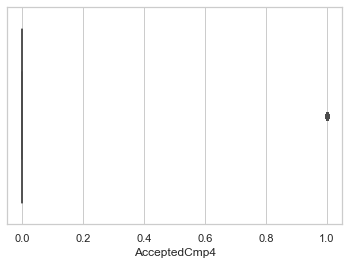

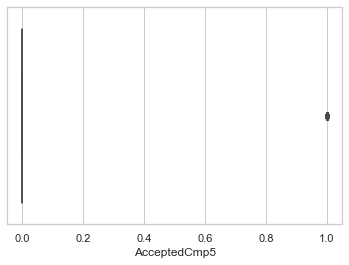

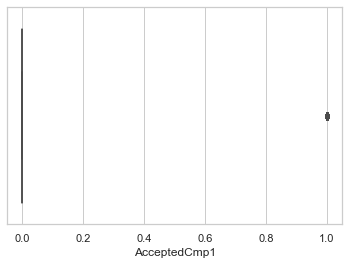

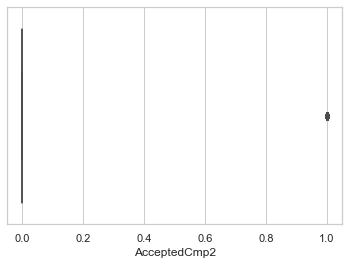

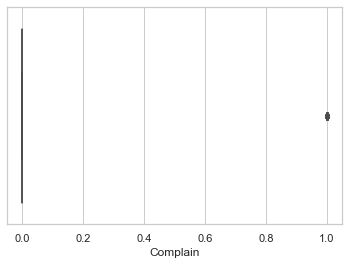

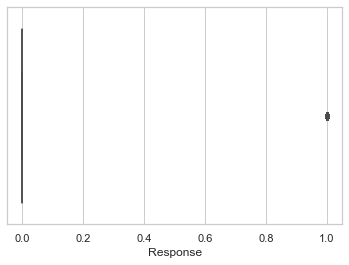

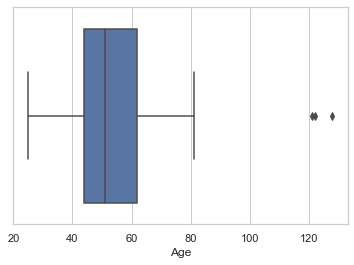

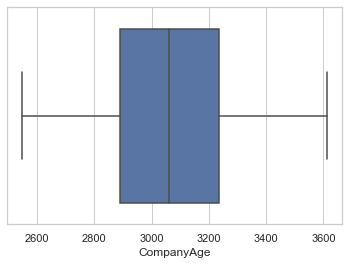

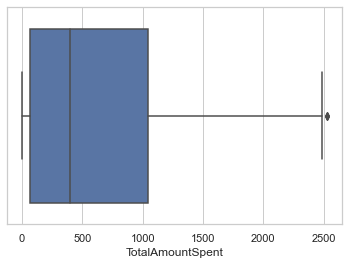

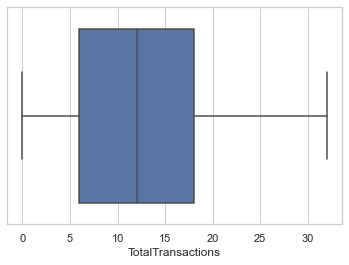

In [17]:
num_cols_list = df.describe().columns.to_list()

for col in num_cols_list:
    sns.boxplot(x=df[col])
    plt.show()

<a id="data-preprocessing"></a>

## Data Preprocessing